Идея этого блокнота - в том, чтобы проверить, верна ли формула для комплексного логарифма, которую я получил на бумаге и насколько

Исходный логагифм был таким:

$$ 
\ln(1 + \frac{\psi(\upsilon+i\omega_+)}{q})
$$

Я захотел разложить его в сумму действительной и мнимой частей.

$$
\Re(\ln(x+iy) = \frac{1}{2} \ln(x^2+y^2)
$$
$$
\Im(\ln(x+iy) = \arctan(\frac{y}{x}) + 2\pi k
$$

Вооружившись этим знанием, начнём раскладывать логарифм.

$$
\ln(1 + \frac{\psi(\upsilon+i\omega_+)}{q}) = \ln(q + \psi(\upsilon+i\omega_+)) - \ln(q)
$$

Уже неплохо, но дальнейшей декомпозиции для произвольной модели добиться не получится. Но всё не так плохо, потому что есть ограничения на вид $\psi(\xi)$, в силу того, что это РПЛЭ. Позже воплотим их, пока рассмотрим модель Б-Ш.

$$\psi(\xi) = \frac{\sigma^2}{2} \xi^2 - i\gamma\xi$$

$$
f(\upsilon) = (\ln(q + \psi(\upsilon+i\omega_+)) - \ln(q) = \ln(q + \frac{\sigma^2}{2} (\upsilon+i\omega_+)^2 - i\gamma(\upsilon+i\omega_+)) - \ln(q) =
$$

$$
= \ln(q + \frac{\sigma^2}{2} (\upsilon^2+ 2i\upsilon\omega_+ + (i\omega_+)^2) - i\gamma\upsilon - i\gamma i\omega_+) - \ln(q) = \ln(q + \frac{\sigma^2}{2} (\upsilon^2+ 2i\upsilon\omega_+ - \omega_+^2) - i\gamma\upsilon + \gamma\omega_+) - \ln(q) = 
$$

$$
= \ln(q + \frac{\sigma^2}{2} \upsilon^2 + i\sigma^2 \upsilon\omega_+ - \frac{\sigma^2}{2}\omega_+^2 - i\gamma\upsilon + \gamma\omega_+) - \ln(q) = 
\ln((q + \frac{\sigma^2}{2} \upsilon^2 - \frac{\sigma^2}{2}\omega_+^2 + \gamma\omega_+) + i(\sigma^2 \upsilon\omega_+ - \gamma\upsilon) ) - \ln(q) =
$$

$$
= \ln((q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+) + i(\upsilon(\sigma^2\omega_+ - \gamma)) ) - \ln(q) =
$$

Используя $ x = q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+$ и $ y = \upsilon(\sigma^2 \omega_+ - \gamma) )$, можно воплотить формулы, описанные в первом блоке.

Итак,

$$
\Re f = \frac{1}{2} \ln((q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+)^2 + \upsilon(\sigma^2 \omega_+ - \gamma)^2) - \ln(q)
$$

$$
\Im f = \arctan(y/x) + 2\pi k = \arctan(\frac{\upsilon(\sigma^2 \omega_+ - \gamma)}{q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+}) + 2\pi k
$$


Вооружившись всем этим, можно получить декомпозицию:
$f = \Re f + i\Im f = \frac{1}{2} \ln((q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+)^2 + \upsilon(\sigma^2 \omega_+ - \gamma)^2) - \ln(q) + i (\arctan(\frac{\upsilon(\sigma^2 \omega_+ - \gamma)}{q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+}) + 2\pi k) $

Выберем главное значение, положив $k=0$. Тогда

$f = \Re f + i\Im f = \frac{1}{2} \ln((q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+)^2 + \upsilon(\sigma^2 \omega_+ - \gamma)^2) - \ln(q) + i (\arctan(\frac{\upsilon(\sigma^2 \omega_+ - \gamma)}{q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+})) $

Можно переходить к кодированию формул.

Сначала - оригинальный вид:

$$ 
\ln(1 + \frac{\psi(\upsilon+i\omega_+)}{q})
$$

Поскольку мы в модели Б-Ш, он запишется в виде

$ 
\ln(1 + \frac{\frac{\sigma^2}{2}(\upsilon+i\omega_+)^2 - i\gamma(\upsilon+i\omega_+)}{q})
$

In [7]:
from numpy import log

V0 = 0.3
r_premia = 10
r = log(r_premia/100 + 1)
sigma = V0
gamma = r - 0.5 * sigma**2
omega_plus = 1
T = 1
N = 5
delta_t = T/N
q = 1.0/delta_t + r

def f_original(v):
    frac_numerator = (sigma**2 / 2) * (v + 1j * omega_plus)**2 - 1j*gamma*(v + 1j * omega_plus)
    frac_denominator = q
    argument = 1 + frac_numerator/frac_denominator
    return(log(argument))

print(f_original(10))

(0.634360978347+0.0413173638614j)


Теперь декомпозированный вариант
$$
f(\upsilon) = \frac{1}{2} \ln((q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+)^2 + \upsilon(\sigma^2 \omega_+ - \gamma)^2) - \ln(q) + i (\arctan(\frac{\upsilon(\sigma^2 \omega_+ - \gamma)}{q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+})) 
$$

Лучше использовать представление:
$ x = q + \frac{\sigma^2}{2} (\upsilon^2 - \omega_+^2) + \gamma\omega_+$ и $ y = \upsilon(\sigma^2 \omega_+ - \gamma) )$

$f =  \frac{1}{2}ln(r^2) + i\arctan(\frac{y}{x}) $
где $r = (x^2 + y^2)^{\frac{1}{2}}$

In [13]:
from numpy import log
from numpy import arctan

def f_decomposed(v):
    x = q + sigma**2/2 * (v**2 - omega_plus**2) + gamma * omega_plus
    y = v * (sigma**2 * omega_plus - gamma)
    ln_first = 0.5 * log(x**2 + y**2)
    real_part = ln_first - log(q)
    imag_part = arctan(y/x)
    return real_part + 1j * imag_part

print(f_decomposed(10))

(0.634360978347+0.0413173638614j)


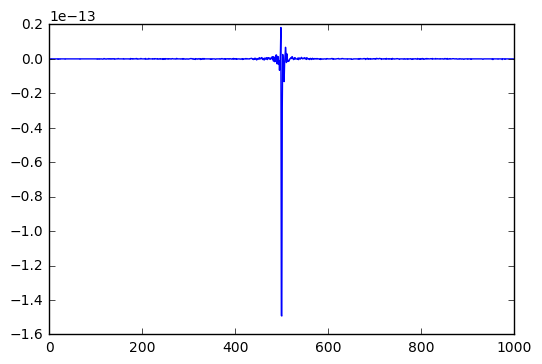

In [17]:
from numpy import linspace, abs
import matplotlib.pyplot as plt

space = linspace(-100, 100, num=1000)

error = (abs(f_decomposed(space)) - abs(f_original(space)))/abs(f_original(space))
plt.plot(error)
plt.show()